In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# About the Dataset
Student Sleep Patterns Dataset
This dataset explores the sleep patterns of university students, aiming to identify correlations between sleep duration, sleep quality, and various lifestyle factors. The data is synthetic, meaning it was artificially generated and does not represent real individuals. However, it follows realistic distributions and relationships to provide a useful basis for analysis and modeling.
More documentation can be found is a word document attached to this codefile

Data Source: https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns

In [69]:
df = pd.read_csv(r"C:\Users\JABARi\Documents\GitHub\ML-classification-project\student_sleep_patterns.csv")
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [70]:
# Convert Sleep_Quality to binary classification
df['Sleep_Quality'] = df['Sleep_Quality'].apply(lambda x: 0 if x <= 5 else 1)
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,1,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,0,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,0,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,1,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,0,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,0,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,0,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,1,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,0,19.10,15.49,8.35,7.20


# Exploratory Data Analysis

In [71]:
#Chceking the shape of the dataset
df.shape

(500, 14)

In [72]:
#Checking the datatypes
df.dtypes

Student_ID               int64
Age                      int64
Gender                  object
University_Year         object
Sleep_Duration         float64
Study_Hours            float64
Screen_Time            float64
Caffeine_Intake          int64
Physical_Activity        int64
Sleep_Quality            int64
Weekday_Sleep_Start    float64
Weekend_Sleep_Start    float64
Weekday_Sleep_End      float64
Weekend_Sleep_End      float64
dtype: object

In [73]:
#Checking missing values
df.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [74]:
#Checking statistics of dataset
df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,0.494000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,0.500465,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,0.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,0.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,0.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,1.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,1.000000,21.930000,22.000000,8.980000,10.990000


In [75]:
#Examining the columns
# Move the Sleep_Quality column to the last position
sleep_quality = df.pop('Sleep_Quality')
df['Sleep_Quality'] = sleep_quality
# Verify the column order
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Sleep_Quality
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,14.16,4.05,7.41,7.06,1
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,8.73,7.10,8.21,10.21,0
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,20.00,20.47,6.88,10.92,0
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,19.82,4.08,6.69,9.42,1
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,20.98,6.12,8.98,9.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,17.42,8.43,6.93,10.78,0
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,1.22,15.54,5.85,7.23,0
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,9.94,2.25,5.46,10.72,1
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,19.10,15.49,8.35,7.20,0


In [76]:
# Dropping unrequired columns
columns_to_drop = ['Student_ID', 'Gender']
df = df.drop(columns=columns_to_drop)

In [77]:
# Define the target variable (y) and features (X)
y = df['Sleep_Quality']
X = df[['Age', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']]
df

,Age,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Sleep_Quality
0,24,2nd Year,7.7,7.9,3.4,2,37,14.16,4.05,7.41,7.06,1
1,21,1st Year,6.3,6.0,1.9,5,74,8.73,7.10,8.21,10.21,0
2,22,4th Year,5.1,6.7,3.9,5,53,20.00,20.47,6.88,10.92,0
3,24,4th Year,6.3,8.6,2.8,4,55,19.82,4.08,6.69,9.42,1
4,20,4th Year,4.7,2.7,2.7,0,85,20.98,6.12,8.98,9.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,2nd Year,5.1,9.3,1.9,4,110,17.42,8.43,6.93,10.78,0
496,20,2nd Year,8.9,7.7,3.5,3,40,1.22,15.54,5.85,7.23,0
497,21,3rd Year,5.7,6.4,3.9,1,68,9.94,2.25,5.46,10.72,1
498,18,2nd Year,4.9,0.5,3.5,0,12,19.10,15.49,8.35,7.20,0


In [79]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
correlation_matrix


,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
Age,1.000000,-0.016015,0.057414,-0.081954,0.008263,0.016019,0.015307,0.005480,0.019787,0.059230
Sleep_Duration,-0.016015,1.000000,-0.011092,0.067934,-0.014531,-0.006768,-0.079370,0.035302,-0.035287,-0.043764
Study_Hours,0.057414,-0.011092,1.000000,-0.040334,0.032473,-0.048811,-0.008048,-0.009699,0.010816,0.051128
Screen_Time,-0.081954,0.067934,-0.040334,1.000000,0.052428,-0.036853,-0.073045,-0.044792,-0.018322,-0.096358
Caffeine_Intake,0.008263,-0.014531,0.032473,0.052428,1.000000,-0.028061,-0.005488,0.019844,0.003950,0.006227
Physical_Activity,0.016019,-0.006768,-0.048811,-0.036853,-0.028061,1.000000,-0.002916,0.037970,0.034551,0.021855
Weekday_Sleep_Start,0.015307,-0.079370,-0.008048,-0.073045,-0.005488,-0.002916,1.000000,0.024099,-0.028516,0.113335
Weekend_Sleep_Start,0.005480,0.035302,-0.009699,-0.044792,0.019844,0.037970,0.024099,1.000000,-0.052135,0.073362
Weekday_Sleep_End,0.019787,-0.035287,0.010816,-0.018322,0.003950,0.034551,-0.028516,-0.052135,1.000000,-0.001388
Weekend_Sleep_End,0.059230,-0.043764,0.051128,-0.096358,0.006227,0.021855,0.113335,0.073362,-0.001388,1.000000


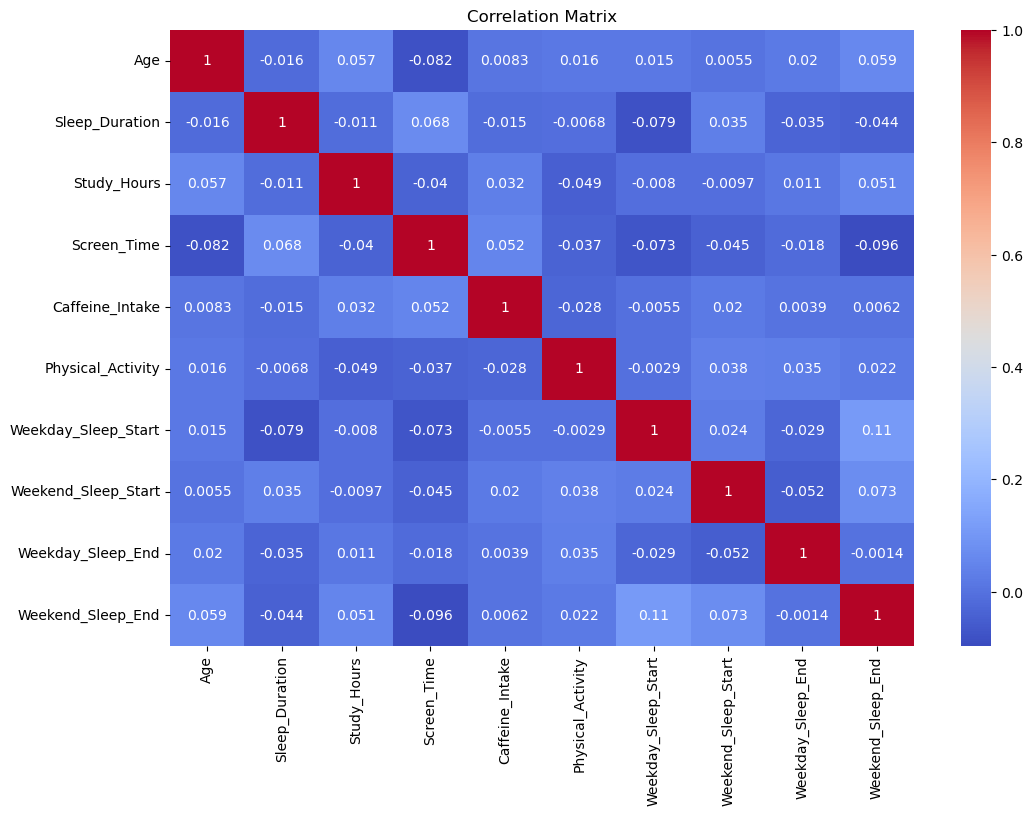

In [80]:
#Correlation Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

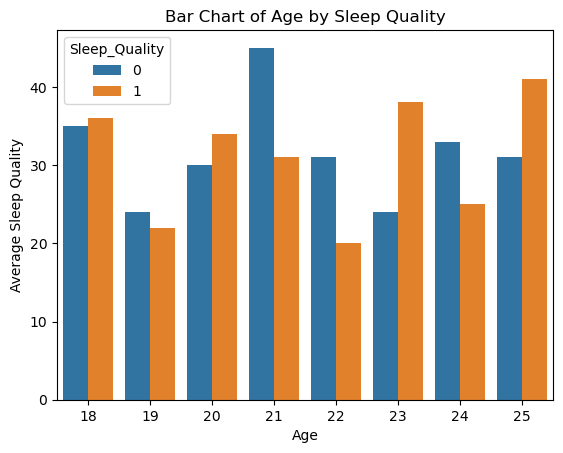

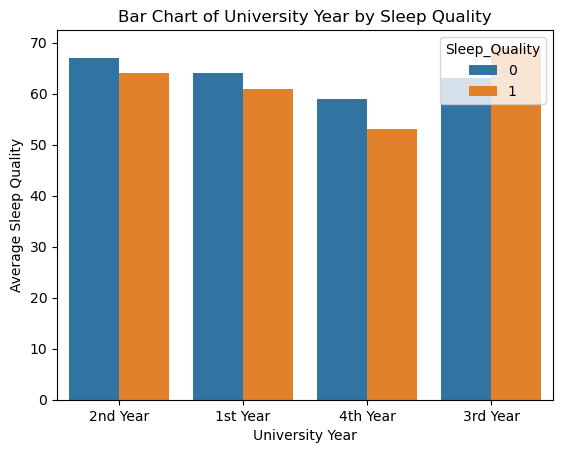

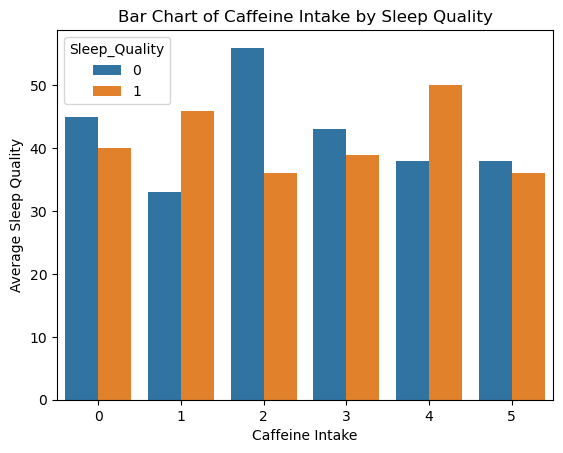

In [94]:
# Bar chart for Age against Sleep_Quality
sns.countplot(x='Age', hue='Sleep_Quality', data=df)
plt.title('Bar Chart of Age by Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Average Sleep Quality')
plt.show()

# Bar chart for University_Year against Sleep_Quality
sns.countplot(x='University_Year', hue='Sleep_Quality', data=df)
plt.title('Bar Chart of University Year by Sleep Quality')
plt.xlabel('University Year')
plt.ylabel('Average Sleep Quality')
plt.show()

# Bar chart for Caffeine_Intake against Sleep_Quality
sns.countplot(x='Caffeine_Intake', hue='Sleep_Quality', data=df)
plt.title('Bar Chart of Caffeine Intake by Sleep Quality')
plt.xlabel('Caffeine Intake')
plt.ylabel('Average Sleep Quality')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

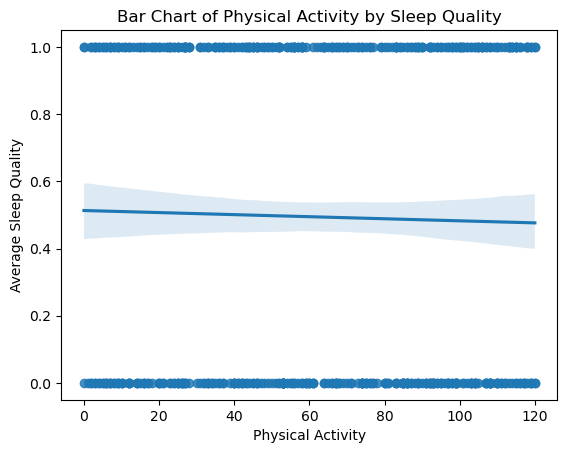

In [82]:
# Regplot for Physical Activity against Sleep_Quality
sns.regplot(x='Physical_Activity', y='Sleep_Quality', data=df)
plt.title('Bar Chart of Physical Activity by Sleep Quality')
plt.xlabel('Physical Activity')
plt.ylabel('Average Sleep Quality')
plt.show

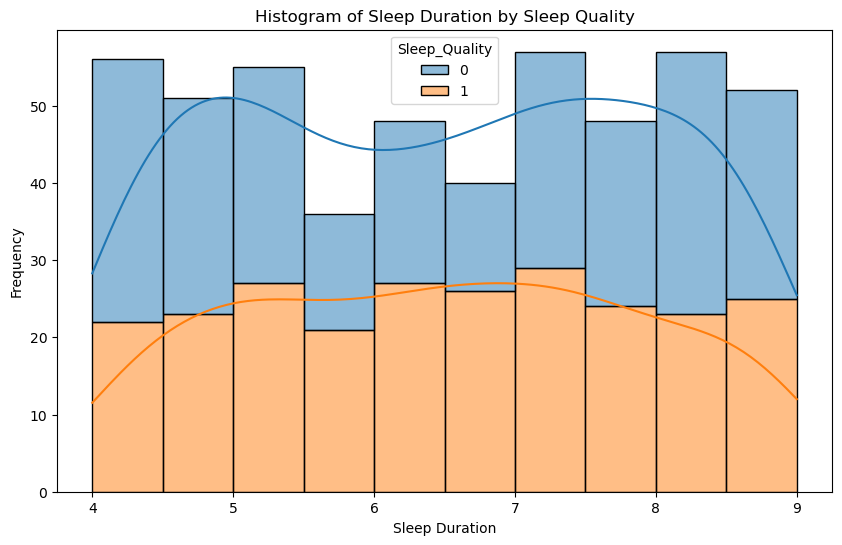

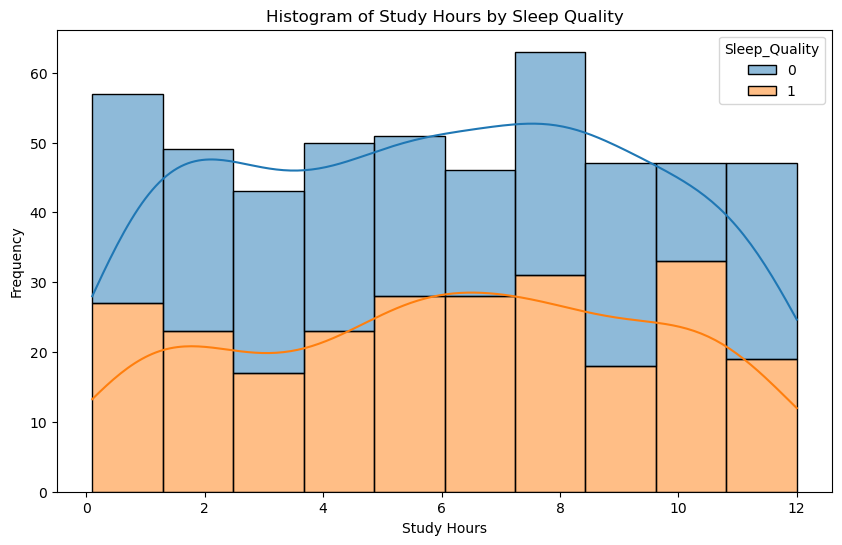

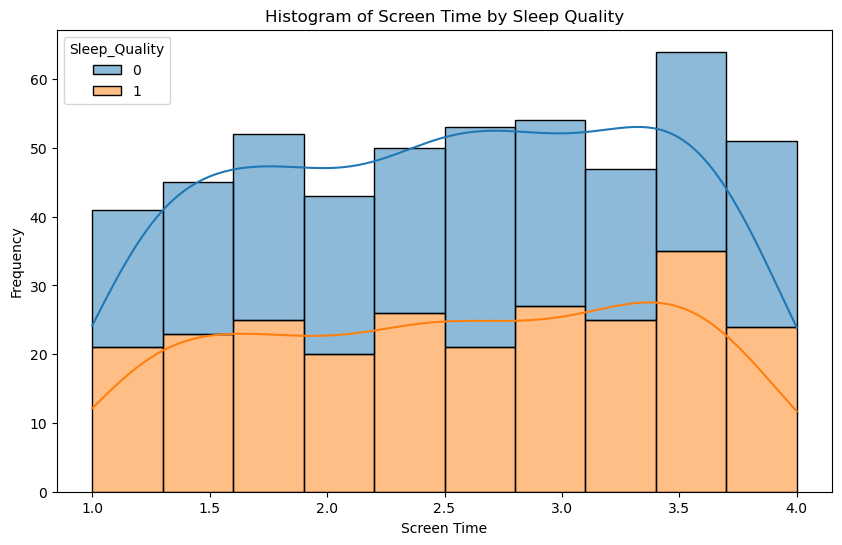

In [83]:
# Histogram for Sleep_Duration against Sleep_Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sleep_Duration', hue='Sleep_Quality', multiple='stack', kde=True)
plt.title('Histogram of Sleep Duration by Sleep Quality')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()

# Histogram for Study_Hours against Sleep_Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Study_Hours', hue='Sleep_Quality', multiple='stack', kde=True)
plt.title('Histogram of Study Hours by Sleep Quality')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

# Histogram for Screen_Time against Sleep_Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Screen_Time', hue='Sleep_Quality', multiple='stack', kde=True)
plt.title('Histogram of Screen Time by Sleep Quality')
plt.xlabel('Screen Time')
plt.ylabel('Frequency')
plt.show()

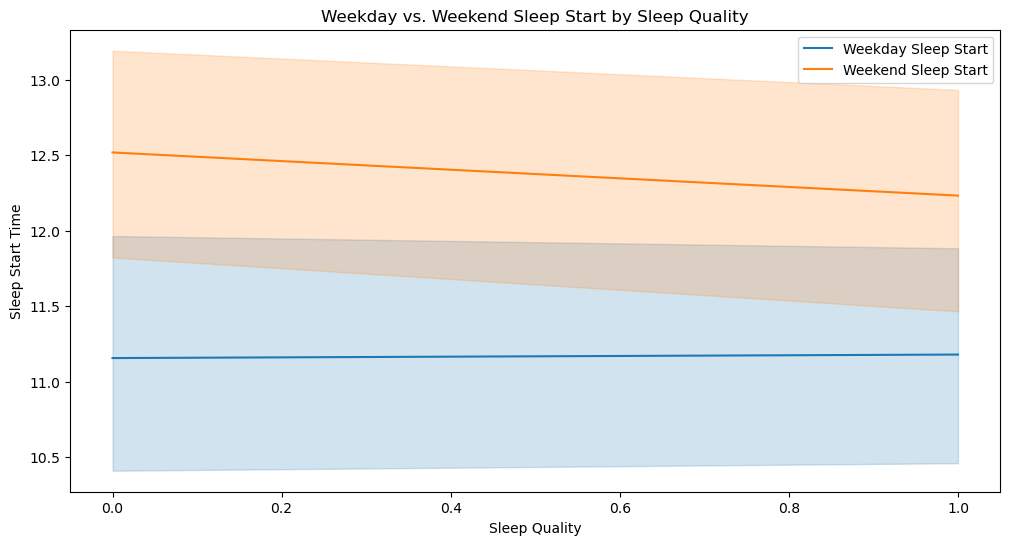

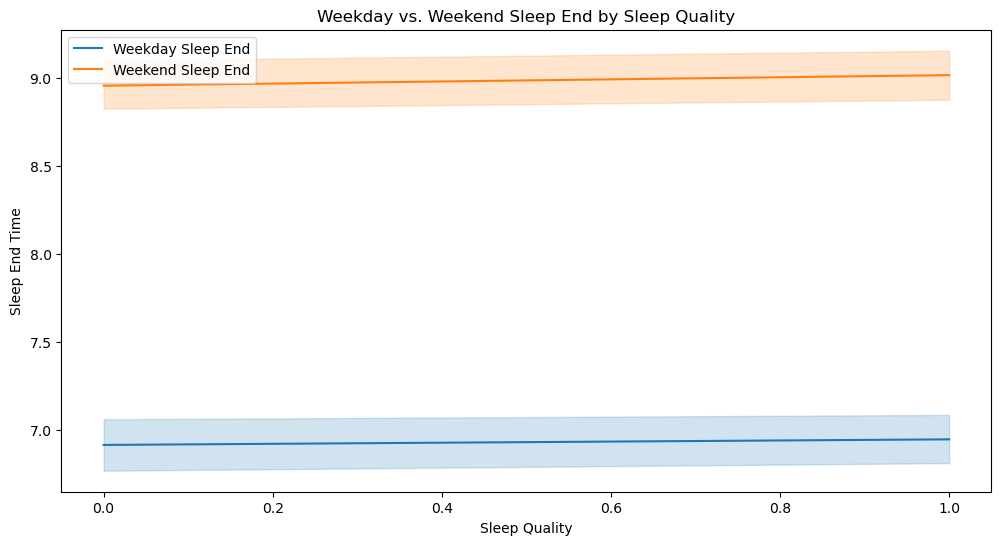

In [86]:
# Line plot for Weekday vs. Weekend Sleep Start
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Sleep_Quality', y='Weekday_Sleep_Start', label='Weekday Sleep Start')
sns.lineplot(data=df, x='Sleep_Quality', y='Weekend_Sleep_Start', label='Weekend Sleep Start')
plt.title('Weekday vs. Weekend Sleep Start by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep Start Time')
plt.legend()
plt.show()

# Line plot for Weekday vs. Weekend Sleep End
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Sleep_Quality', y='Weekday_Sleep_End', label='Weekday Sleep End')
sns.lineplot(data=df, x='Sleep_Quality', y='Weekend_Sleep_End', label='Weekend Sleep End')
plt.title('Weekday vs. Weekend Sleep End by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep End Time')
plt.legend()
plt.show()

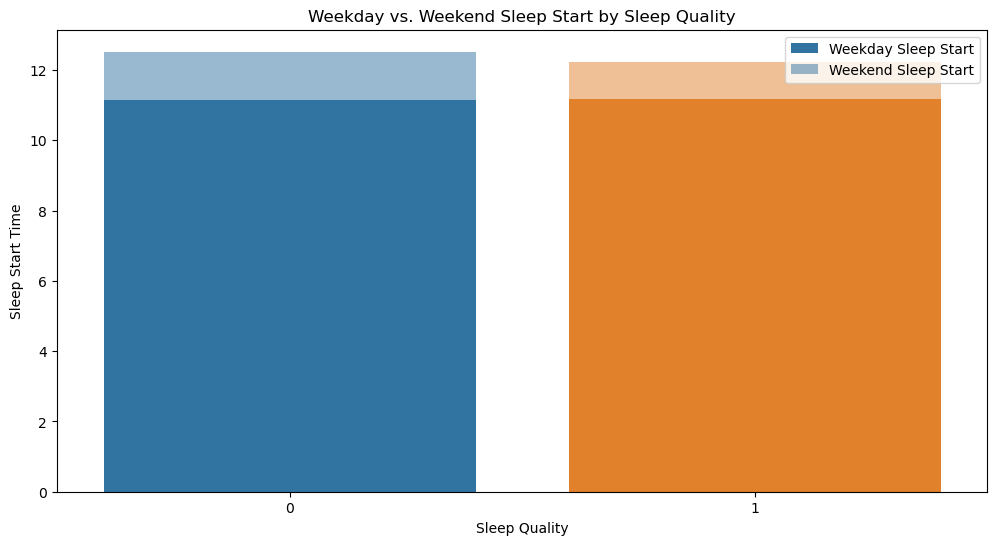

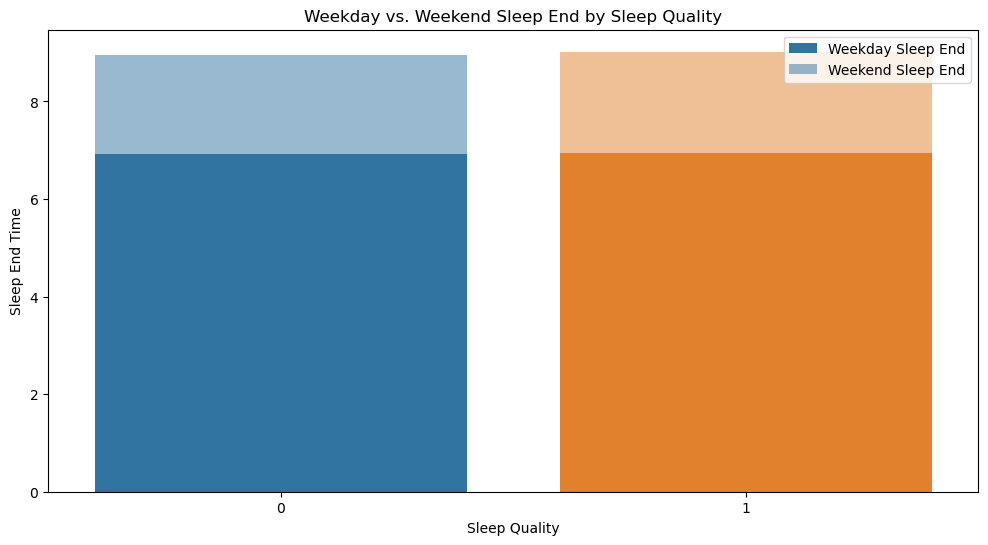

In [87]:
# Bar plot for Weekday vs. Weekend Sleep Start
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sleep_Quality', y='Weekday_Sleep_Start', ci=None, label='Weekday Sleep Start')
sns.barplot(data=df, x='Sleep_Quality', y='Weekend_Sleep_Start', ci=None, label='Weekend Sleep Start', alpha=0.5)
plt.title('Weekday vs. Weekend Sleep Start by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep Start Time')
plt.legend(['Weekday Sleep Start', 'Weekend Sleep Start'])
plt.show()

# Bar plot for Weekday vs. Weekend Sleep End
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sleep_Quality', y='Weekday_Sleep_End', ci=None, label='Weekday Sleep End')
sns.barplot(data=df, x='Sleep_Quality', y='Weekend_Sleep_End', ci=None, label='Weekend Sleep End', alpha=0.5)
plt.title('Weekday vs. Weekend Sleep End by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep End Time')
plt.legend(['Weekday Sleep End', 'Weekend Sleep End'])
plt.show()

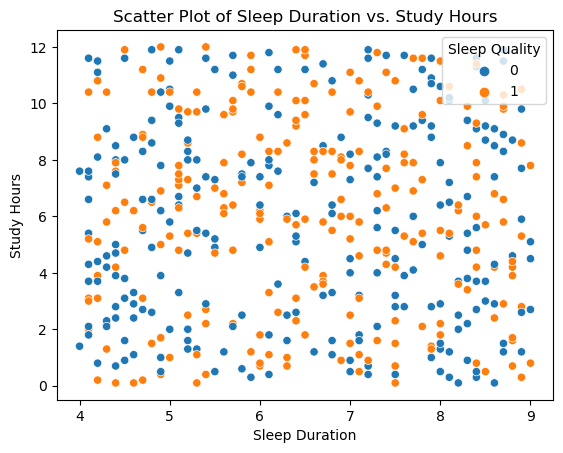

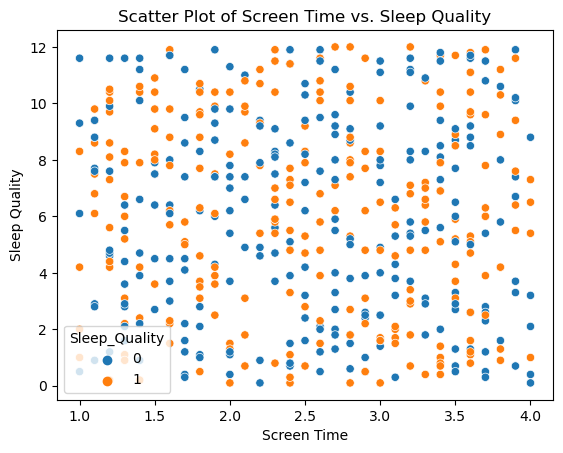

In [91]:
# Scatter plot for Sleep_Duration vs. Study_Hours
sns.scatterplot(x='Sleep_Duration', y='Study_Hours', hue='Sleep_Quality', data=df)
plt.title('Scatter Plot of Sleep Duration vs. Study Hours')
plt.xlabel('Sleep Duration')
plt.ylabel('Study Hours')
plt.legend(title='Sleep Quality')
plt.show()

# Scatter plot for Screen_Time vs. Sleep_Quality
sns.scatterplot(x='Screen_Time', y='Study_Hours', hue='Sleep_Quality', data=df)
plt.title('Scatter Plot of Screen Time vs. Sleep Quality')
plt.xlabel('Screen Time')
plt.ylabel('Sleep Quality')
plt.show()